<a href="https://colab.research.google.com/github/abhilekhsingh041992/machine-learning/blob/master/basic_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

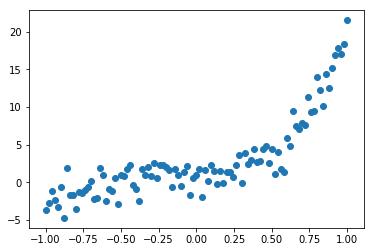

[0.928212  1.9707398 3.4277093 5.9179373 4.1944637 4.26064  ]


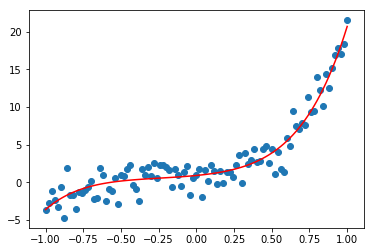

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 

class StraightLineModel:
  
  def model(self, X, w):                                                           
    return tf.multiply(X, w)


  def run(self):
    x_train = np.linspace(-1, 1, 101)                                  
    y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.33     

    plt.scatter(x_train, y_train)                                      
    plt.show()                      


    X = tf.placeholder(tf.float32)
    Y = tf.placeholder(tf.float32)

    learning_rate = 0.01                                                       
    training_epochs = 50 

    w = tf.Variable(0.0, name="weights") 
    model_y = model(X, w)

    cost = tf.square(Y - model_y)

    train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


    with tf.Session() as sess:
      init = tf.global_variables_initializer()                                   
      sess.run(init) 

      for epoch in range(training_epochs):
        for (x, y) in zip(x_train, y_train):

          sess.run(train_op, feed_dict={X: x, Y: y})  

          #print(x, y,  sess.run(w))

      w_val = sess.run(w) 


      print(w_val)

      plt.scatter(x_train, y_train)                                              
      y_learned = x_train*w_val                                                  
      plt.plot(x_train, y_learned, 'r')                                          
      plt.show()
      
      
class PolyLineModel:
  num_coeffs = 6  
  
  def get_data(self):
    trX = np.linspace(-1, 1, 101)                                              

                                                               
    trY_coeffs = [1, 2, 3, 4, 5, 6]                                            
    trY = 0                                                                    
    for i in range(PolyLineModel.num_coeffs):                                                
        trY += trY_coeffs[i] * np.power(trX, i)                                

    trY += np.random.randn(*trX.shape) * 1.5                                   

    plt.scatter(trX, trY)                                                      
    plt.show()
    
    return trX, trY
  
  def model(self, X, w):                                                           
    terms = []                                                             
    for i in range(PolyLineModel.num_coeffs):                                            
        term = tf.multiply(w[i], tf.pow(X, i))                             
        terms.append(term)                                                 
    return tf.add_n(terms) 
  
  
  def run(self):
    trX, trY = self.get_data()
    
    X = tf.placeholder(tf.float32)
    Y = tf.placeholder(tf.float32)
    
    learning_rate = 0.01                                                       
    training_epochs = 100 

    #w = tf.Variable(0.0, name="weights") 
    w = tf.Variable([0.] * PolyLineModel.num_coeffs, name="parameters")
    
    model_y = self.model(X, w)

    cost = tf.square(Y - model_y)
    #cost = (tf.pow(Y-model_y, 2))  

    train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


    with tf.Session() as sess:
      init = tf.global_variables_initializer()                                   
      sess.run(init) 

      for epoch in range(training_epochs):
        for (x, y) in zip(trX, trY):

          sess.run(train_op, feed_dict={X: x, Y: y})  

          #print(x, y,  sess.run(w))

      w_val = sess.run(w) 
      print(w_val)

      plt.scatter(trX, trY)                                              
#       y_learned = trX*w_val  
      trY2 = 0
      for i in range(PolyLineModel.num_coeffs):
        trY2 += w_val[i] * np.power(trX, i)
      
      plt.plot(trX, trY2, 'r')                                          
      plt.show()
      
      
# straight_line_model = StraightLineModel()
# straight_line_model.run()

poly_line_model = PolyLineModel()
poly_line_model.run()
